In [235]:
import cv2
import numpy as np

In [236]:
# Reading the required image in
# which operations are to be done.
# Make sure that the image is in the same
# directory in which this python program is
image  = cv2.imread("./line_images/IMG_0106.jpg")

In [237]:
# Define the range of beige color in HSV - preferred for color-based segmentation
lower_beige = np.array([0, 10, 180])
upper_beige = np.array([40, 150, 255])

In [238]:
# Convert image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [239]:
# Create a binary mask to isolate beige regions
mask = cv2.inRange(hsv, lower_beige, upper_beige)
# cv2.namedWindow('mask', cv2.WINDOW_NORMAL)
# cv2.imshow('mask', mask)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [240]:
# Perform morphological operations to remove noise
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=3)

In [241]:
# Find contours in the binary mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [242]:
# Filter contours based on area
min_contour_area = 4000  # Adjust as needed
min_aspect_ratio = 0.5  # Adjust as needed

In [243]:
filtered_contours = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    solidity = float(area)/hull_area
    extent = float(area)/(w*h)
    
    if area > min_contour_area and aspect_ratio > min_aspect_ratio and solidity > 0.6 and extent > 0.1:
        filtered_contours.append(cnt)

In [244]:
# Draw contours on the original image
cv2.drawContours(image, filtered_contours, -1, (0, 0, 255), 20)

array([[[125, 152, 173],
        [115, 142, 163],
        [110, 137, 158],
        ...,
        [ 54,  67,  83],
        [ 58,  71,  87],
        [ 57,  70,  86]],

       [[116, 143, 164],
        [119, 146, 167],
        [119, 146, 167],
        ...,
        [ 52,  65,  81],
        [ 53,  66,  82],
        [ 49,  62,  78]],

       [[107, 134, 155],
        [116, 143, 164],
        [122, 149, 170],
        ...,
        [ 51,  64,  80],
        [ 50,  63,  79],
        [ 47,  60,  76]],

       ...,

       [[ 37,  53,  69],
        [ 40,  56,  72],
        [ 41,  57,  73],
        ...,
        [ 98, 116, 133],
        [ 95, 113, 130],
        [108, 126, 143]],

       [[ 35,  51,  67],
        [ 38,  54,  70],
        [ 40,  56,  72],
        ...,
        [101, 119, 136],
        [ 99, 117, 134],
        [108, 126, 143]],

       [[ 35,  51,  67],
        [ 36,  52,  68],
        [ 38,  54,  70],
        ...,
        [103, 121, 138],
        [102, 120, 137],
        [109, 127, 144]]

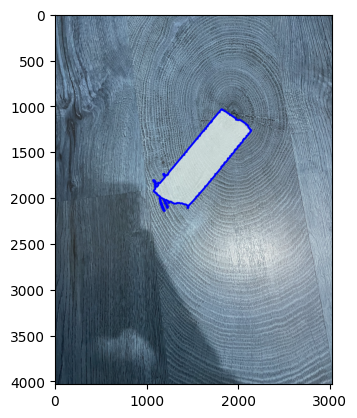

In [245]:
import matplotlib.pyplot as plt
# All the changes made in the input image are finally
# written on a new image houghlines.jpg
plt.imshow(image)

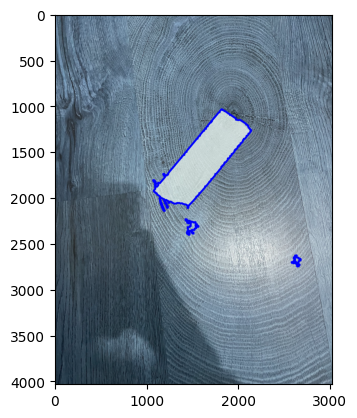

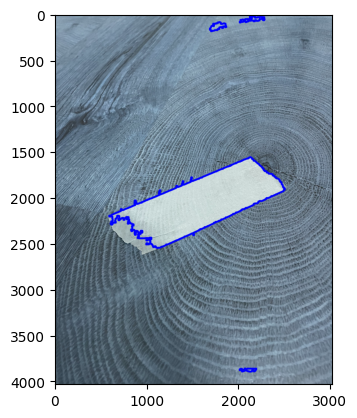

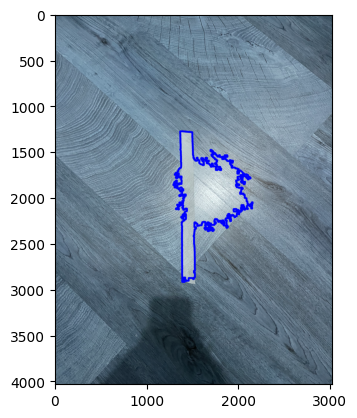

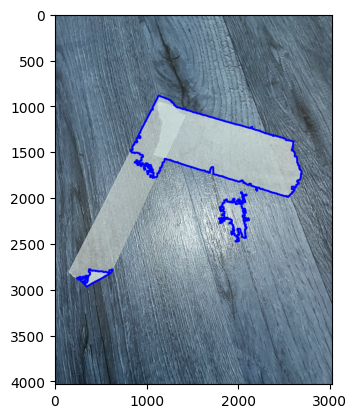

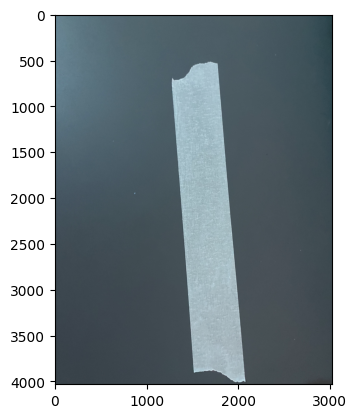

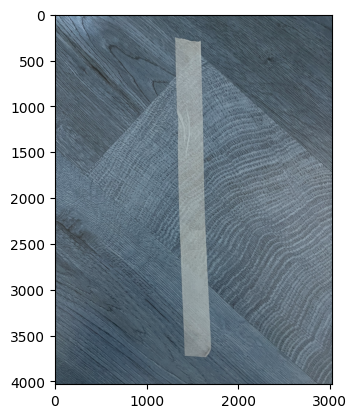

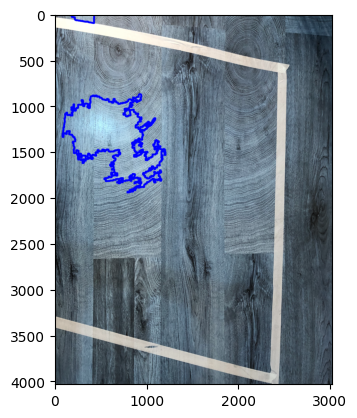

In [246]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the range of beige color in HSV - preferred for color-based segmentation
lower_beige = np.array([0, 10, 180])
upper_beige = np.array([40, 150, 255])

# Set minimum values for contour properties
min_contour_area = 3000
min_aspect_ratio = 0.5
solidity = 0.5
extent = 0.1

# Get a list of all the image files in the 'line_images' directory
image_files = os.listdir('./line_images')

# Process each image file
for image_file in image_files:
    # Read the image
    image = cv2.imread(f'./line_images/{image_file}')

    # Convert image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a binary mask to isolate beige regions
    mask = cv2.inRange(hsv, lower_beige, upper_beige)

    # Perform morphological operations to remove noise
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=3)

    # Find contours in the binary mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area, aspect ratio, solidity and extent
    filtered_contours = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = float(w)/h
        hull = cv2.convexHull(cnt)
        hull_area = cv2.contourArea(hull)
        solidity_im = float(area)/hull_area
        extent_im = float(area)/(w*h)

        if area > min_contour_area and aspect_ratio > min_aspect_ratio and solidity_im > solidity and extent_im > extent:
            filtered_contours.append(cnt)

    # Draw contours on the original image
    cv2.drawContours(image, filtered_contours, -1, (0, 0, 255), 20)

    # Display the image
    plt.imshow(image)
    plt.show()

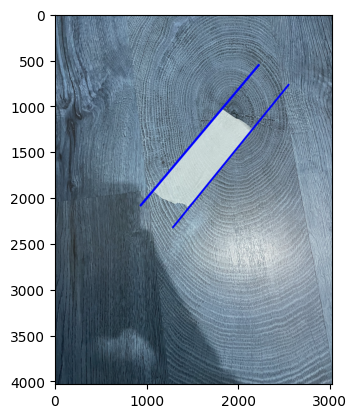

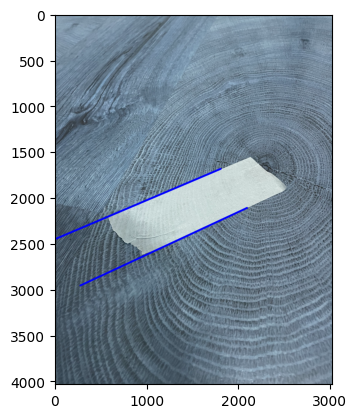

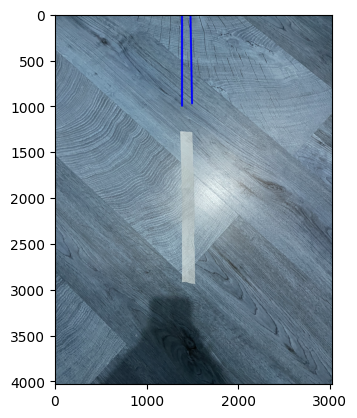

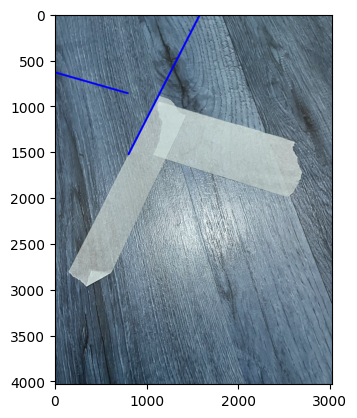

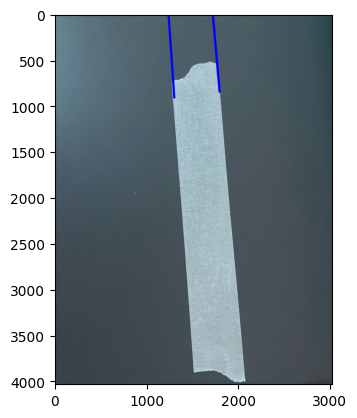

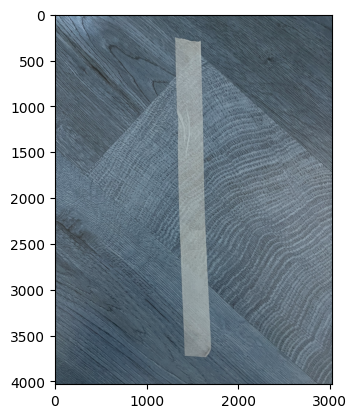

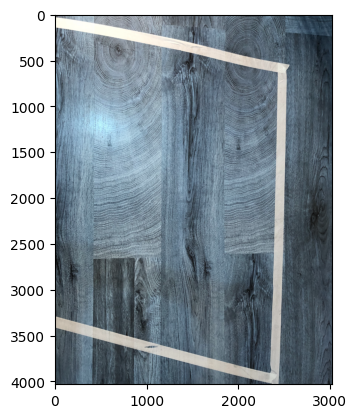

In [247]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the range of beige color in HSV - preferred for color-based segmentation
lower_beige = np.array([0, 10, 180])
upper_beige = np.array([40, 150, 255])

# Get a list of all the image files in the 'line_images' directory
image_files = os.listdir('./line_images')

# Process each image file
for image_file in image_files:
    # Read the image
    image = cv2.imread(f'./line_images/{image_file}')

    # Convert image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a binary mask to isolate beige regions
    mask = cv2.inRange(hsv, lower_beige, upper_beige)

    # Perform morphological operations to remove noise
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=3)

    # Apply Canny edge detection
    edges = cv2.Canny(mask, 50, 150, apertureSize=3)

    # Apply Hough line transformation
    lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

    # Draw lines on the original image
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))

            cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 20)

    # Display the image
    plt.imshow(image)
    plt.show()